In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [95]:
#d = "BERT/pred_intra_Bert.csv"
#d = "Roberta/pred_intra_Roberta.csv"
#d = "distilroberta/pred_intra_distilRoberta.csv"
#d = "GPT2/pred_intra_gpt2l.csv"
d = "DialoGPT/pred_intra_dialogptL.csv"

preds_stereo = pd.read_csv(d,index_col= 0)

### $M = \frac{P(\text{AntiStereo})-P(\text{Stereo})}{P(\text{Stereo})- P(\text{Random})}$

In [77]:
def sst(data):
    datafilS = np.array(data.Score_Stereo)
    datafilA = np.array(data.Score_Anti)
    datafilR = np.array(data.Score_Random)

    Met = (datafilA - datafilS)/(datafilS-datafilR)
    Metabs = abs((datafilA - datafilS)/(datafilS-datafilR))
    ns = np.sum(datafilS >= datafilA)
    ss = ns*100/len(data)

    aux = np.abs(Met) <= 1
    ns1 = np.sum(Met[aux] <= 0)*100/len(Met[aux])
    return ss,Met,Metabs,ns1

In [78]:
#BERT
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

59.82905982905983 3601.7918613388356 5625.90325748017 86.0223642172524


In [83]:
#RoBERTa
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

61.490978157644825 711.271345991314 1385.0929179804882 85.0199203187251


In [86]:
#distilRoBERTa
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

62.82051282051282 1199.3430871526202 1443.4648032362604 83.95061728395062


In [90]:
#GPT2
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

61.965811965811966 -0.9105751715560998 1.997983795466731 67.7361853832442


In [93]:
#GPT2 L
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

64.29249762583096 0.04008675314253316 1.2040361838226534 71.52777777777777


In [96]:
#DialoGPT L
ss,m,M,n = sst(preds_stereo)
print(ss,np.mean(m),np.mean(M),n)

60.30389363722697 -1.4987553191608225 3.8987708699655297 70.64538514920194


In [79]:
def grafica(M,name):
    aux = np.array(M) < -4
    aux2 = np.array(M) > 4
    M[aux] = -4
    M[aux2] = 4
    M = np.array(M,dtype=int)
    plots = sns.histplot(M,discrete = True)#binwidth=1)

    for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
        plots.annotate(format(bar.get_height()*100/len(M), '.2f')+'%', 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

    plt.xlabel("Métrica")
    plt.xticks([-4,-3,-2,-1,-0,1,2,3,4],labels = ['<4','-3','-2','-1','0','1','2','3','>4'])
    plt.title(str(name+" sobre Stereoset"))
    plt.show()

def grafica_gran(M,name,binw,range):
    aux = np.abs(np.array(M)) <= range
    mm = np.array(M[aux])
    sns.histplot(mm,binwidth=binw)
    plt.title(str(name+" sobre Stereoset"))
    plt.show()

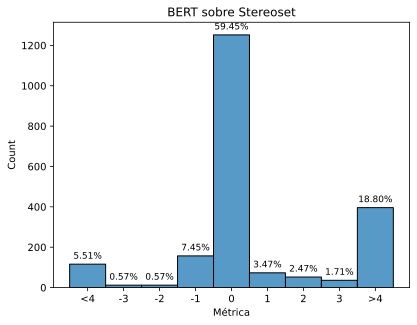

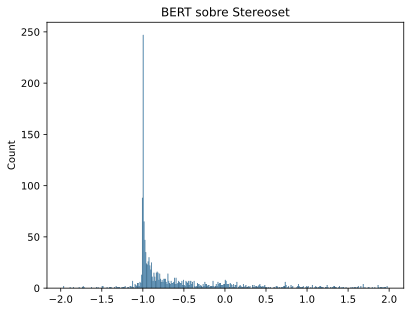

In [80]:
grafica(m,"BERT")
grafica_gran(m,'BERT',0.01,2)

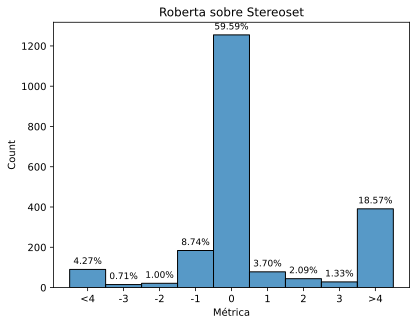

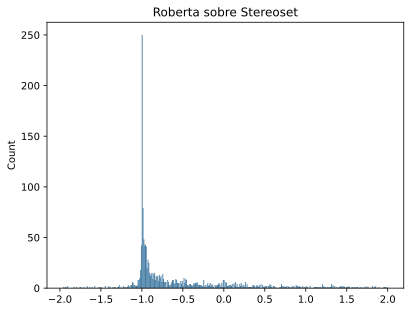

In [84]:
grafica(m,'Roberta')
grafica_gran(m,'Roberta',0.01,2)

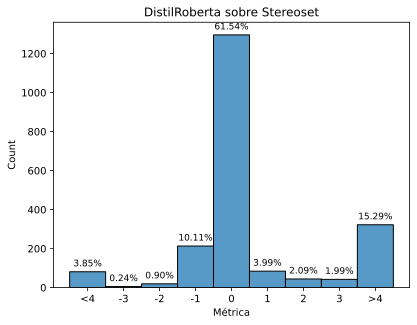

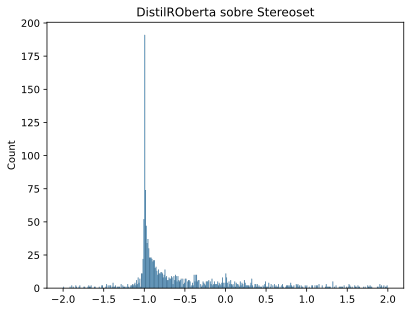

In [88]:
grafica(m,'DistilRoberta')
grafica_gran(m,'DistilROberta',0.01,2)

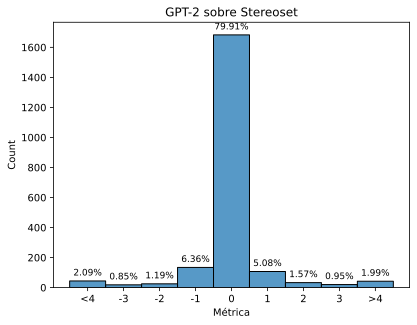

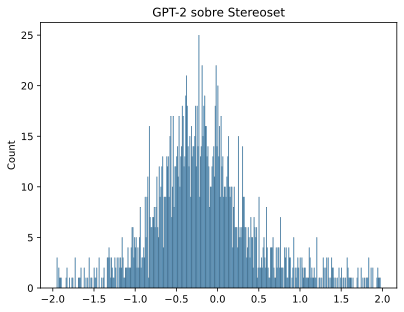

In [91]:
grafica(m,'GPT-2')
grafica_gran(m,'GPT-2',0.01,2)

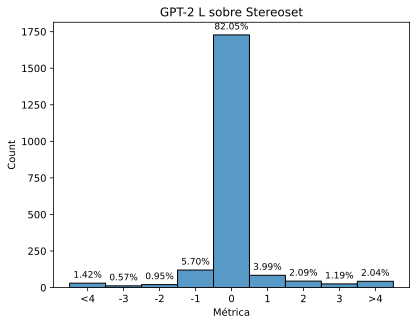

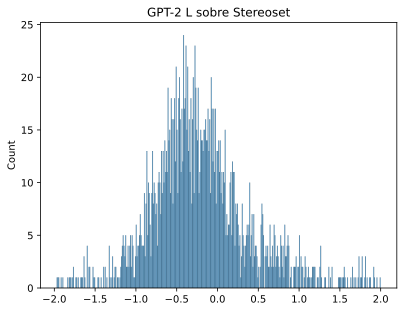

In [94]:
grafica(m,'GPT-2 L')
grafica_gran(m,'GPT-2 L',0.01,2)

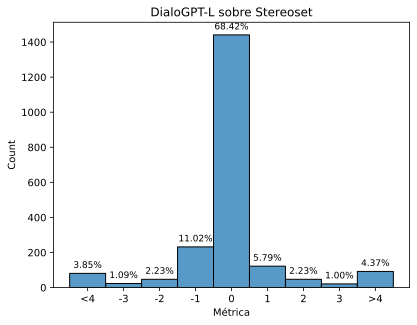

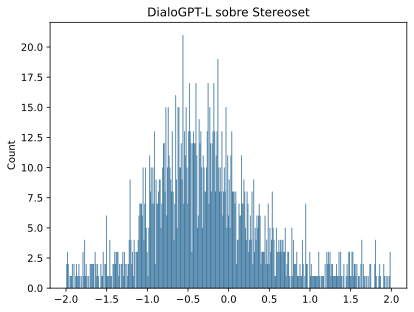

In [97]:
grafica(m,'DialoGPT-L')
grafica_gran(m,'DialoGPT-L',0.01,2)